In [1]:
import traci
import sumolib

In [3]:
sumoBinary = "sumo"
sumoCmd = [sumoBinary, "-c", "nt1.sumocfg"]

traci.start(sumoCmd)

TraCIException: Connection 'default' is already active.

In [ ]:
tls_ids = traci.trafficlight.getIDList()
print("Semáforos", tls_ids)

In [ ]:
id_semaforo = tls_ids[0]
programa = traci.trafficlight.getAllProgramLogics(id_semaforo)
print(programa)

In [3]:
from traci._trafficlight import Logic, Phase

#Crear un nuevo programa con fases personalizadas




new_logic = Logic(programID="nuevo_programa", type=0,currentPhaseIndex=0,phases=[Phase(duration=30, state="GGrr", minDur=30, maxDur=30 ), Phase(duration=5, state='yyrr', minDur=5, maxDur=5), Phase(duration=30, state='rrGG', minDur=30, maxDur=30), Phase(duration=5, state='rryy', minDur=5, maxDur=5), Phase(duration=1, state='rrrr', minDur=1.0, maxDur=1.0)])

#Aplicar el nuevo programa al semáforo
traci.trafficlight.setProgramLogic(id_semaforo, new_logic)


traci.trafficlight.setProgram(id_semaforo, "nuevo_programa")

NameError: name 'id_semaforo' is not defined

In [2]:
def new_logic(ggrr, yyrr, rrgg, rryy):

    tls_ids = traci.trafficlight.getIDList()
    id_semaforo = tls_ids[0]
    programa = traci.trafficlight.getAllProgramLogics(id_semaforo)
    
    from traci._trafficlight import Logic, Phase

    new_logic = Logic(programID="nuevo_programa", type=0,currentPhaseIndex=0,phases=[Phase(duration=ggrr, state="GGrr", minDur=ggrr, maxDur=ggrr ), Phase(duration=yyrr, state='yyrr', minDur=yyrr, maxDur=yyrr), Phase(duration=rrgg, state='rrGG', minDur=rrgg, maxDur=rrgg), Phase(duration=rryy, state='rryy', minDur=rryy, maxDur=rryy)])

    traci.trafficlight.setProgramLogic(id_semaforo, new_logic)

    traci.trafficlight.setProgram(id_semaforo, "nuevo_programa")

    #print(traci.trafficlight.getCompleteRedYellowGreenDefinition(id_semaforo))


In [3]:
import numpy as np

def n_vehiculos(n0, n1):

    t0=0
    t1=0

    for i in range(n0):

        t0+= np.random.exponential(scale=3600/n0)

        traci.vehicle.add(
            vehID=f"veh_r0_{i}",
            routeID="r_0", # Asegúrate de tener un tipo definido (por defecto puedes omitir esto si usas default)
            depart=t0
        )

    for i in range(n1):

        t1+= np.random.exponential(scale=3600/n1)

        traci.vehicle.add(
            vehID=f"veh_r1_{i}",
            routeID="r_1",
            depart=t1
        )

In [4]:
import numpy as np

def n_vehiculos2(n0, n1):

    t0=0
    t1=0

    for i in range(n0):

        #t0+= np.random.exponential(scale=3600/n0)

        traci.vehicle.add(
            vehID=f"veh_r0_{i}",
            routeID="r_0", # Asegúrate de tener un tipo definido (por defecto puedes omitir esto si usas default)
            depart=(3600/n0)*i
        )

    for i in range(n1):

        #t1+= np.random.exponential(scale=3600/n1)

        traci.vehicle.add(
            vehID=f"veh_r1_{i}",
            routeID="r_1",
            depart=(3600/n1)*i
        )

In [5]:
def avg_time():
    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    return average

In [ ]:
#Se importan algunos de los paquetes requeridos
import random as rd
import pandas as pd
import traci
import sumolib

avgtimes=[]#tiempos promedio
ggrrs = []#(verde Norte-Sur)
yyrrs = []#(amarillo Norte-Sur)
rrggs = []# (verde Este-Oeste)
rryys = []#(amarillo Este-Oeste)
n0s = []#Tiempos ruta 0
n1s = []#Tiempos ruta 1
num_simulations = 5

f0 = [i for i in range(1000,8000, 1000)]
f1 = [i for i in range(1000,10000, 1000)]


for i in range(num_simulations):

    n0 = rd.choice(f0)
    n1 = rd.choice(f1)

    n0s.append(n0)
    n1s.append(n1)

    sumoBinary = "sumo"
    sumoCmd = [sumoBinary, "-c", "nt1.sumocfg"]

    traci.start(sumoCmd)

    n_vehiculos2(2, 1)

    ggrr = rd.randint(20,70) #(verde Norte-Sur) 
    yyrr = rd.randint(2,7) #(amarillo Norte-Sur)
    rrgg = rd.randint(20,70) # (verde Este-Oeste)
    rryy = rd.randint(2,7) #(amarillo Este-Oeste)

    ggrrs.append(ggrr)
    yyrrs.append(yyrr)
    rrggs.append(rrgg)
    rryys.append(rryy)

    new_logic(ggrr, yyrr, rrgg, rryy)
    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    avgtimes.append(average)

    traci.close()
    print(i+1)
data = {
    'Simulation' : range(1, num_simulations + 1),
    'Tiempo promedio' : avgtimes,
    'GGrr (s)' : ggrrs,
    'yyrr (s)' : yyrrs,
    'rrGG (s)' : rrggs,
    'rryy (s)' : rryys,
    'Autos r_0': n0s,
    'Autos r_1': n1s
}

df100 = pd.DataFrame(data)
df100

1


,Simulation,Tiempo promedio,GGrr (s),yyrr (s),rrGG (s),rryy (s),Autos r_0,Autos r_1
0,1,43.0,49,4,24,4,5000,6000


43.0

In [16]:
df100.to_csv('Sim3-11-20.csv', index=False)

In [18]:
df1 = pd.read_csv('Sim3-1-10.csv')
df2 = pd.read_csv('Sim3-11-20.csv')
#df3 = pd.read_csv('Data800.csv')

df = pd.concat([df1, df2], ignore_index = True)

In [72]:
contador = 0
for i in range(1000):
    a = rd.choice(f0)
    b = rd.choice(f1)
    if a<=b:
        contador += 1

print(contador)

643


In [37]:
traci.close()

ConnectionResetError: [WinError 10054] Se ha forzado la interrupción de una conexión existente por el host remoto

In [17]:
df_test.to_csv('df_test.csv', index=False)

In [85]:
h = df['GGrr (s)']

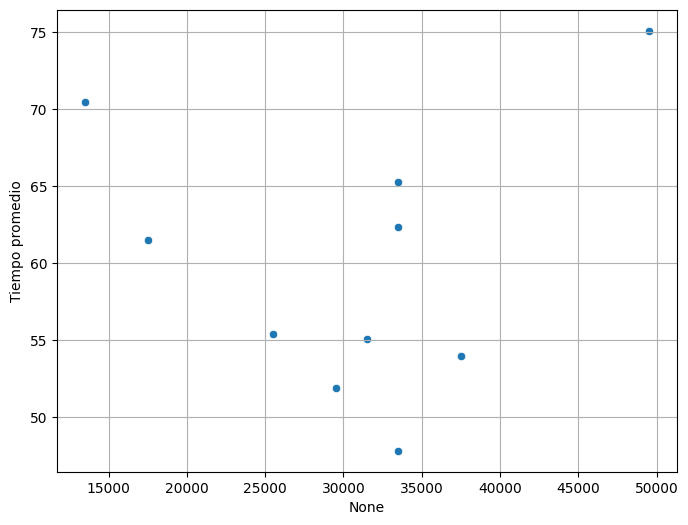

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Autos r_0']+df['Autos r_1'], y=df100['Tiempo promedio'])
plt.grid(True)
plt.show()

In [78]:
import pandas as pd

In [79]:
df1 = pd.read_csv('Data100.csv')
df2 = pd.read_csv('Data1002.csv')
df3 = pd.read_csv('Data800.csv')

In [80]:
df = pd.concat([df1, df2, df3], ignore_index = True)

In [81]:
df

,Simulation,Tiempo promedio,GGrr (s),yyrr (s),rrGG (s),rryy (s),Autos r_0,Autos r_1
0,1,73.552509,17,4,56,2,4500,26000
1,2,47.474440,48,5,57,2,18000,10000
2,3,37.791455,27,2,30,4,15000,2000
3,4,84.612233,13,4,58,3,25500,26000
4,5,56.974968,18,3,15,3,6000,12000
...,...,...,...,...,...,...,...,...
995,796,65.317847,10,5,16,2,15500,18000
996,797,36.361217,24,2,21,4,7500,20000
997,798,47.837209,57,2,58,3,3500,28000
998,799,54.464746,60,4,44,4,13500,4000


In [82]:
df.to_csv('Valores.csv', index = False)

In [31]:
x = [i for i in range(2000,30000, 2000)]

In [45]:
rd.randint(5,10)

10

In [60]:
import random as rd
import pandas as pd
import traci
import sumolib

avgtimes=[]#tiempos promedio
ggrrs = []#(verde Norte-Sur)
yyrrs = []#(amarillo Norte-Sur)
rrggs = []# (verde Este-Oeste)
rryys = []#(amarillo Este-Oeste)
n0s = []#Tiempos ruta 0
n1s = []#Tiempos ruta 1
num_simulations = 100

f0 = [i for i in range(1500,10000, 2000)]
f1 = [i for i in range(8,100000, 5)]


for i in range(num_simulations):

    #n0 = rd.choice(f0)
    n0= 1
    #n1 = rd.choice(f1)
    n1 = f1[i]

    n0s.append(n0)
    n1s.append(n1)

    sumoBinary = "sumo"
    sumoCmd = [sumoBinary, "-c", "nt1.sumocfg"]

    traci.start(sumoCmd)

    n_vehiculos(n0, n1)

    #ggrr = rd.randint(10,60) #(verde Norte-Sur) 
    #yyrr = rd.randint(2,5) #(amarillo Norte-Sur)
    #rrgg = rd.randint(10,60) # (verde Este-Oeste)
    #rryy = rd.randint(2,5) #(amarillo Este-Oeste)

    #ggrrs.append(ggrr)
    #yyrrs.append(yyrr)
    #rrggs.append(rrgg)
    #rryys.append(rryy)

    new_logic(50, 3, 60, 3)

    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    avgtimes.append(average)

    traci.close()
    print(i+1)
data = {
    'Simulation' : range(1, num_simulations + 1),
    'Tiempo promedio' : avgtimes,
    'Autos r_0': n0s,
    'Autos r_1': n1s
}

df100 = pd.DataFrame(data)
df100

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


,Simulation,Tiempo promedio,Autos r_0,Autos r_1
0,1,38.666667,1,8
1,2,37.384615,1,13
2,3,45.833333,1,18
3,4,37.090909,1,23
4,5,40.107143,1,28
...,...,...,...,...
95,96,44.712215,1,483
96,97,43.932515,1,488
97,98,44.753846,1,493
98,99,45.176707,1,498


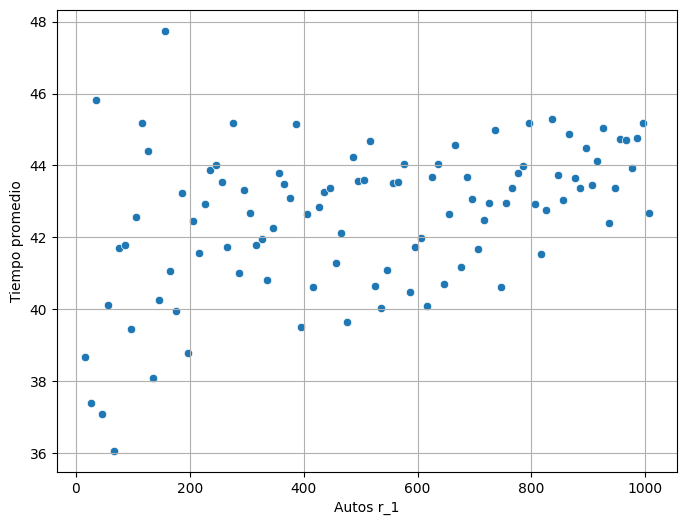

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df100['Autos r_1']+df100['Autos r_1'], y=df100['Tiempo promedio'])
plt.grid(True)
plt.show()

In [26]:
traci.close()

In [30]:
f1 = [i for i in range(1,30000, 200)]

In [31]:
f1

[1,
 201,
 401,
 601,
 801,
 1001,
 1201,
 1401,
 1601,
 1801,
 2001,
 2201,
 2401,
 2601,
 2801,
 3001,
 3201,
 3401,
 3601,
 3801,
 4001,
 4201,
 4401,
 4601,
 4801,
 5001,
 5201,
 5401,
 5601,
 5801,
 6001,
 6201,
 6401,
 6601,
 6801,
 7001,
 7201,
 7401,
 7601,
 7801,
 8001,
 8201,
 8401,
 8601,
 8801,
 9001,
 9201,
 9401,
 9601,
 9801,
 10001,
 10201,
 10401,
 10601,
 10801,
 11001,
 11201,
 11401,
 11601,
 11801,
 12001,
 12201,
 12401,
 12601,
 12801,
 13001,
 13201,
 13401,
 13601,
 13801,
 14001,
 14201,
 14401,
 14601,
 14801,
 15001,
 15201,
 15401,
 15601,
 15801,
 16001,
 16201,
 16401,
 16601,
 16801,
 17001,
 17201,
 17401,
 17601,
 17801,
 18001,
 18201,
 18401,
 18601,
 18801,
 19001,
 19201,
 19401,
 19601,
 19801,
 20001,
 20201,
 20401,
 20601,
 20801,
 21001,
 21201,
 21401,
 21601,
 21801,
 22001,
 22201,
 22401,
 22601,
 22801,
 23001,
 23201,
 23401,
 23601,
 23801,
 24001,
 24201,
 24401,
 24601,
 24801,
 25001,
 25201,
 25401,
 25601,
 25801,
 26001,
 26201,
 